In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

# Data Preprocessing

In [2]:
# Load the data
data = pd.read_csv('titanicdata.csv')

In [3]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')

In [4]:
print(data.head(10))

   Survived  Pclass  Sex        Age
0         0       3    2  22.000000
1         1       1    1  38.000000
2         1       3    1  26.000000
3         1       1    1  35.000000
4         0       3    2  35.000000
5         0       3    2  29.699118
6         0       1    2  54.000000
7         0       3    2   2.000000
8         1       3    1  27.000000
9         1       2    1  14.000000


In [5]:
print(data["Survived"].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [6]:
# It would seem that the data is not balanced.
# We will need to apply stratification to the data to ensure that the training and testing data have the same distribution of the target variable.

In [7]:
from sklearn.model_selection import train_test_split

labels = data["Survived"]
features = data.drop("Survived", axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, random_state=42, shuffle=True, stratify=labels)

print(y_train.value_counts()[1]/y_train.value_counts()[0])
print(y_test.value_counts()[1]/y_test.value_counts()[0])

# The ratio of the number of survivors to the number of non-survivors is the same in the training and testing data.

0.621867881548975
0.6272727272727273


In [8]:
# We will now preprocess the data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, train_size=0.75, random_state=42, shuffle=True, stratify=y_train)

In [9]:
# Sanity check
print(X_train_val.shape)
print(X_val.shape)
print(y_train_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

# The sizes of the validation dataset and the testing dataset are as expected. Data has been preprocessed.

(534, 3)
(178, 3)
(534,)
(178,)
(179, 3)
(179,)


# Logistic Regression Implementation

In [10]:
w = np.zeros(X_train_val.shape[1])
print(w)

[0. 0. 0.]


In [11]:
# Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [12]:
# Cost function
def cost_function(X, y, w):
    m = len(y)
    z = np.dot(X, w)
    h = sigmoid(z)
    cost = (-1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

In [13]:
# Gradient descent
def gradient_descent1(X, y, x_val, y_val, w, alpha, num_iters):
    m = len(y)
    cost_history1 = np.zeros(num_iters)
    cost_history2 = np.zeros(num_iters)
    for i in range(num_iters):
        z = np.dot(X, w)
        h = sigmoid(z)
        w = w - (alpha/m)*np.dot(X.T, h-y)
        cost_history1[i] = cost_function(X, y, w)
        cost_history2[i] = cost_function(x_val, y_val, w)
    return w, cost_history1, cost_history2

# Training the model
def gradient_descent2(X, y, w, alpha, num_iters):
    m = len(y)
    for _ in range(num_iters):
        z = np.dot(X, w)
        h = sigmoid(z)
        w = w - (alpha/m)*np.dot(X.T, h-y)
    return w

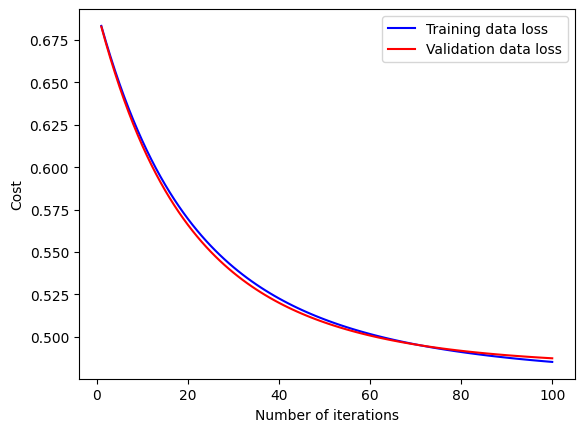

In [25]:
alpha = 0.1
w = np.zeros(X_train_val.shape[1])

w, cost_history_train, cost_history_val = gradient_descent1(X_train_val, y_train_val, X_val, y_val, w, alpha, 100)

plt.plot(range(1, 101), cost_history_train, color='blue', label='Training data loss')
plt.plot(range(1, 101), cost_history_val, color='red', label='Validation data loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

plt.legend()
plt.show()

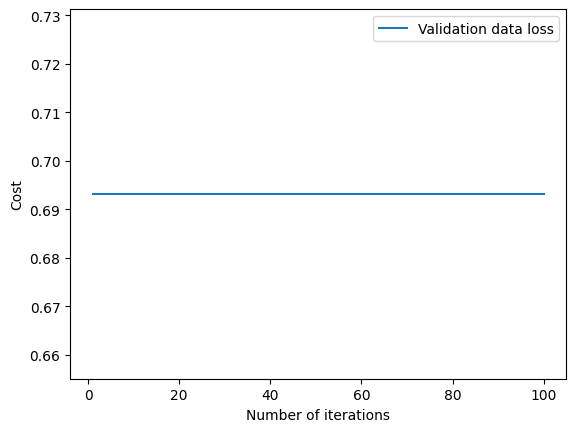

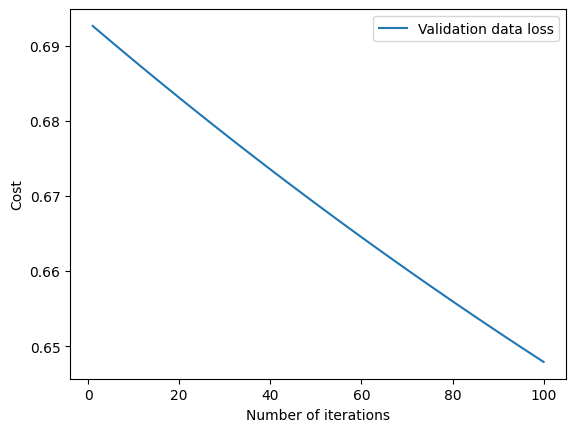

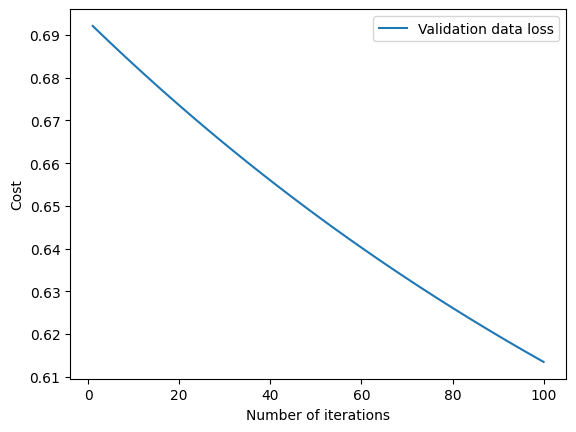

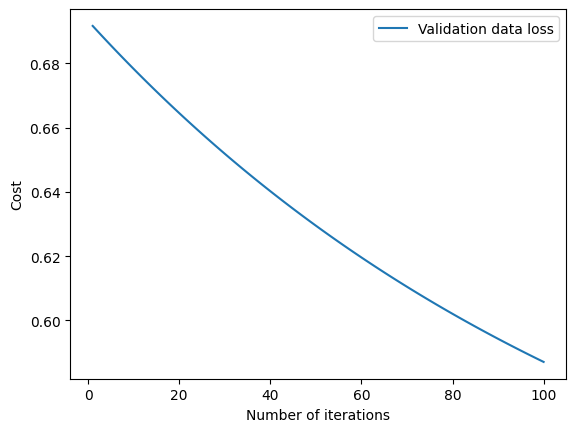

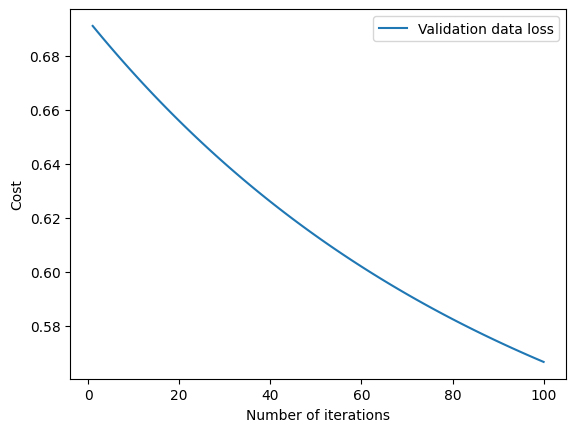

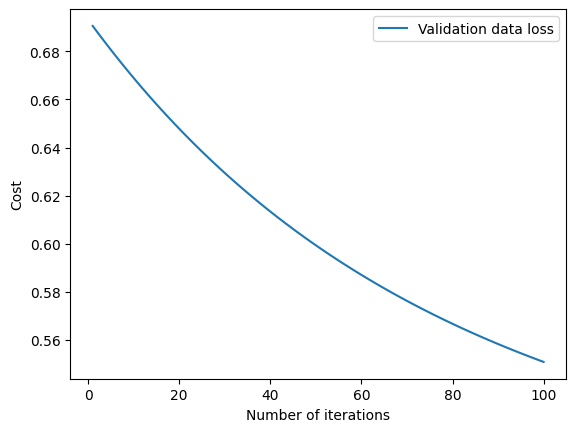

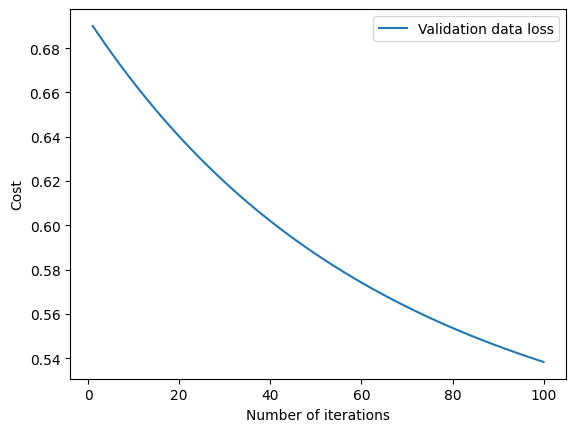

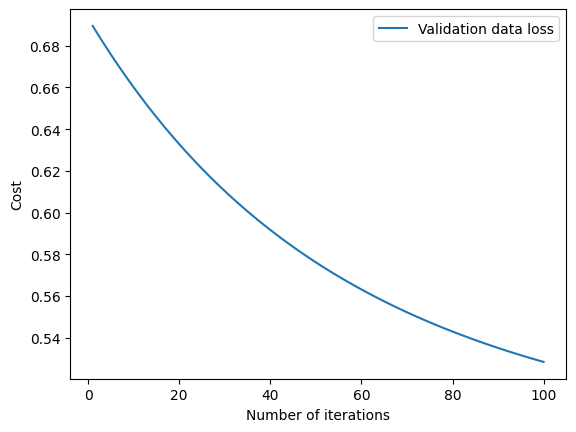

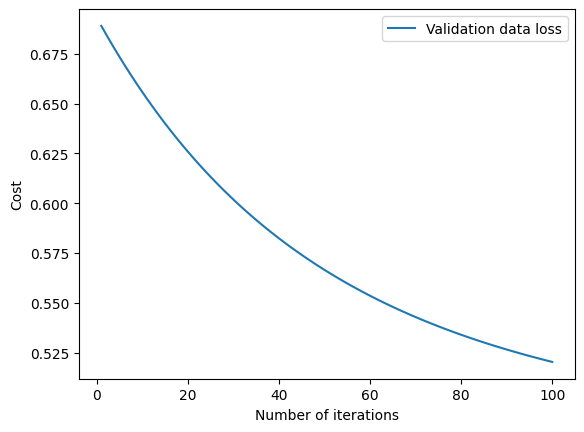

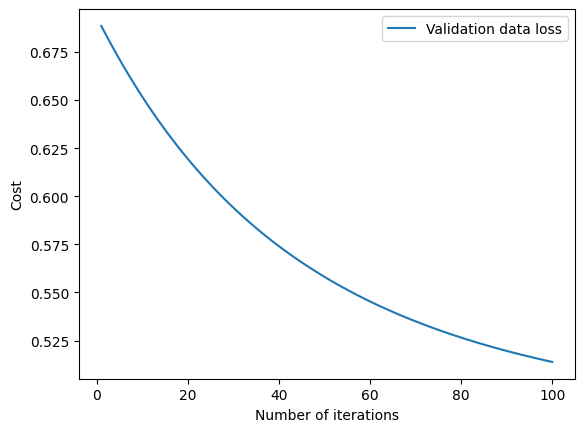

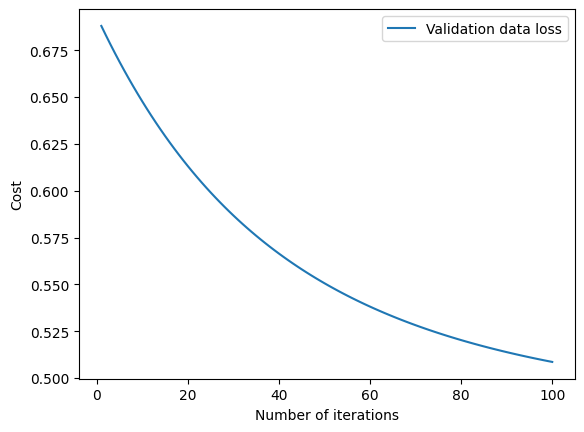

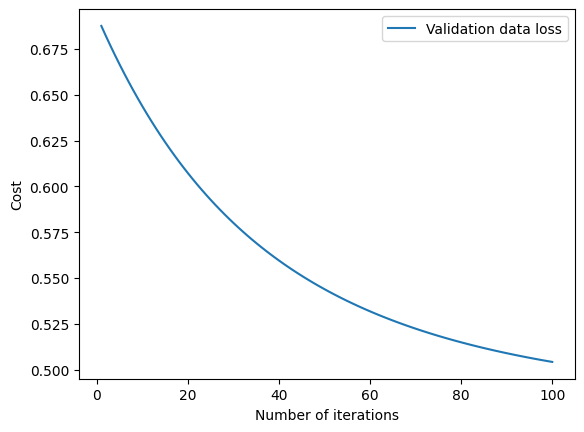

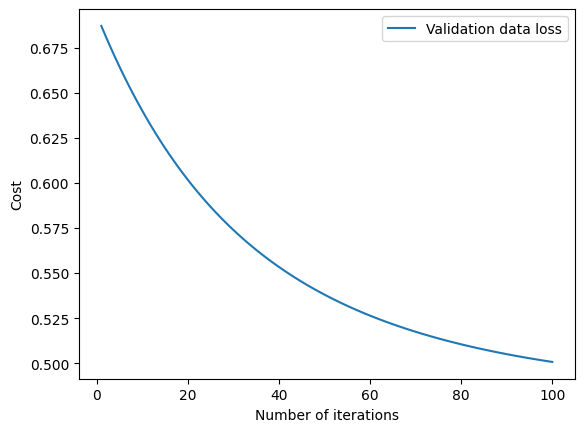

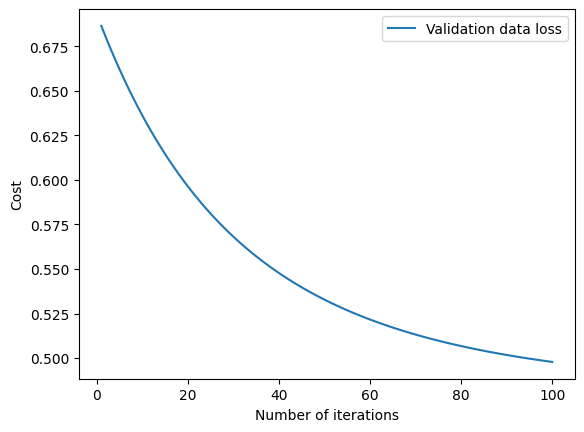

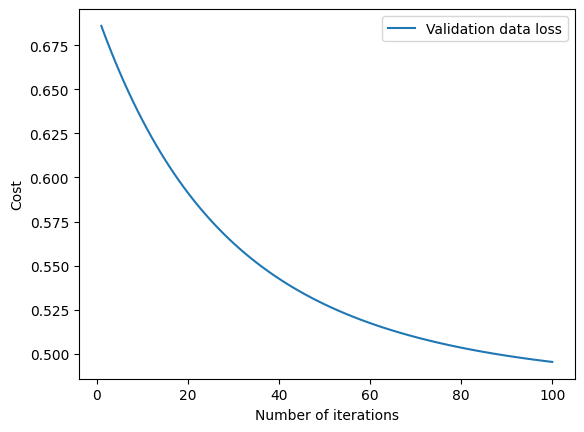

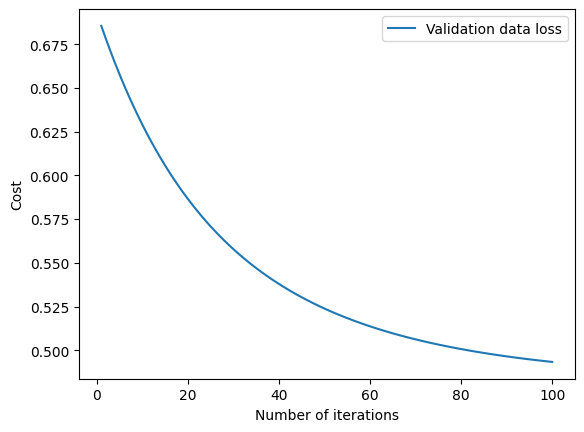

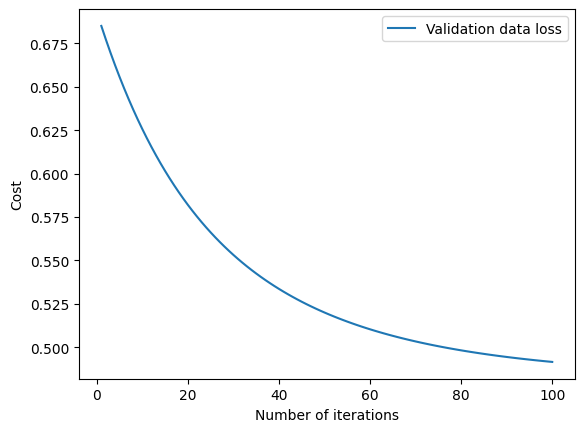

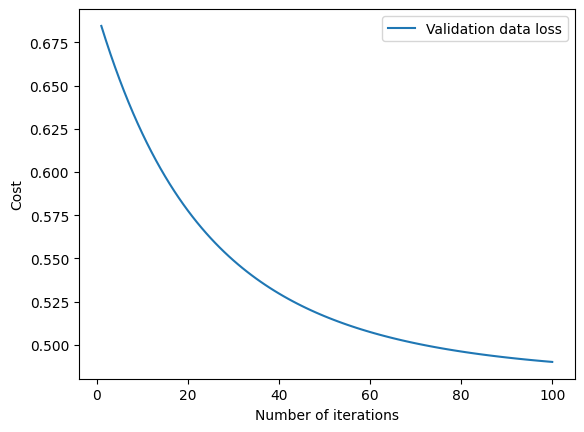

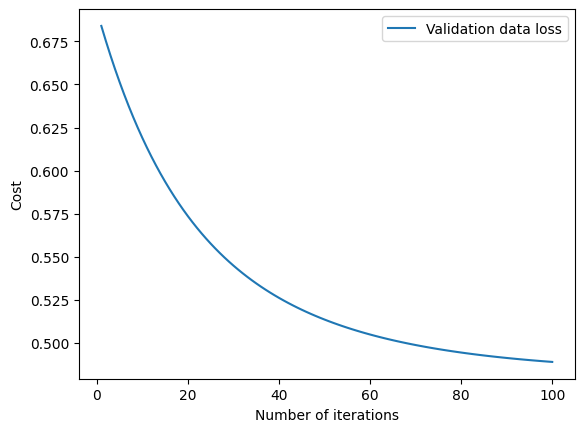

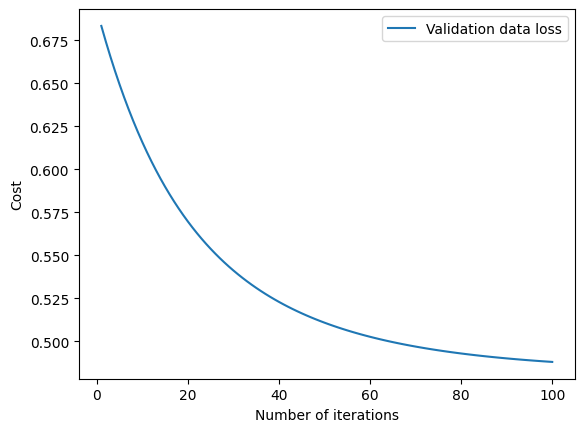

In [22]:
alpha = 0
alpha_increase = 0.005
w = np.zeros(X_train_val.shape[1])

for i in range(20):
    w, cost_history_train, cost_history_val = gradient_descent1(X_train_val, y_train_val, X_val, y_val, w, alpha, 100)
    plt.plot(range(1, 101), cost_history_val, label='Validation data loss')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()
    alpha += alpha_increase
    w = np.zeros(X_train_val.shape[1])

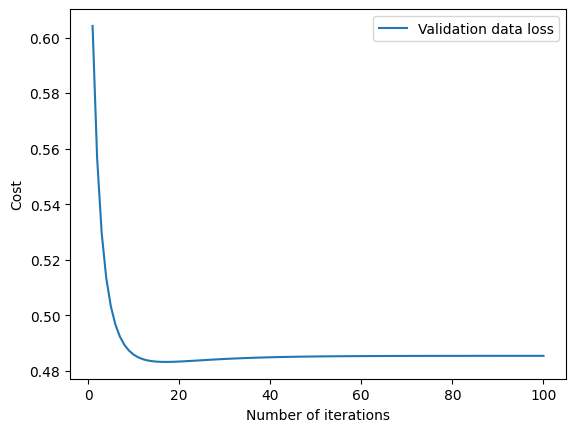

In [23]:
w = np.zeros(X_train_val.shape[1])
alpha = 1

w, cost_history_train, cost_history_val = gradient_descent1(X_train_val, y_train_val, X_val, y_val, w, alpha, 100)
plt.plot(range(1, 101), cost_history_val, label='Validation data loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

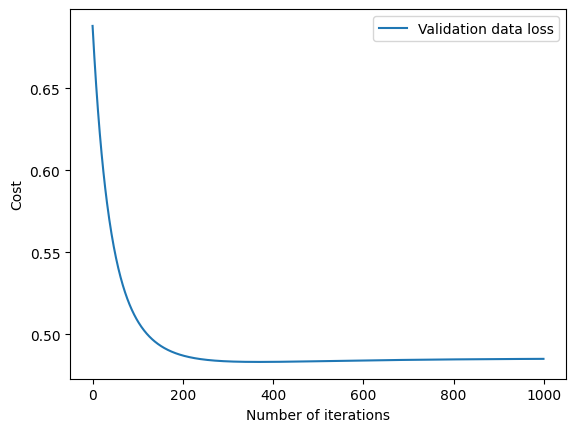

In [16]:
alpha = 0.05
w = np.zeros(X_train_val.shape[1])

w, cost_history_train, cost_history_val = gradient_descent1(X_train_val, y_train_val, X_val, y_val, w, alpha, 1000)
plt.plot(cost_history_val, label='Validation data loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [28]:
# 200 iterations seems to be enough for the model to converge.

x = np.concatenate((X_train_val, X_val), axis=0)
y = np.concatenate((y_train_val, y_val), axis=0)

alpha = 0.05
w = np.zeros(X_train_val.shape[1])

w = gradient_descent2(x, y, w, alpha, 200)

# We will now evaluate the model on the testing data.

def predict(X, w):
    z = np.dot(X, w)
    h = sigmoid(z)
    return h

def confusion_matrix(y, y_pred):
    tp = np.sum((y == 1) & (np.round(y_pred) == 1))
    tn = np.sum((y == 0) & (np.round(y_pred) == 0))
    fp = np.sum((y == 0) & (np.round(y_pred) == 1))
    fn = np.sum((y == 1) & (np.round(y_pred) == 0))
    return tp, tn, fp, fn

def precision(tp, fp):
    return tp/(tp+fp)

def recall(tp, fn):
    return tp/(tp+fn)

def f1_score(precision, recall):
    return 2*precision*recall/(precision+recall)

y_pred = predict(X_test, w)

tp, tn, fp, fn = confusion_matrix(y_test, y_pred)

precision = precision(tp, fp)
recall = recall(tp, fn)
f1 = f1_score(precision, recall)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

accuracy = (tp+tn)/(tp+tn+fp+fn)
print("--------------------")
print("Accuracy: ", accuracy)

Precision:  0.675
Recall:  0.782608695652174
F1 score:  0.7248322147651006
--------------------
Accuracy:  0.770949720670391
